### **Introduction**

Hello! Thanks for visiting our code. We describe our method in our GitHub page. Without that, the following code will probably seem like gibberish. So please, check it out [here](https://github.com/AthanasiosPetsanis/Diploma_Clone) if you haven't already.

To see the code run, just hit  **"Runtime" --> "Run all"**

If you want to change the settings and redo it, just hit **"Runtime" --> "Disconnect and delete runtime"** and then **"Runtime" --> "Run all"**

### **Prerequisites**

#### **MiniGrid**

First we install the simulator (i.e. MiniGrid)

In [1]:
!pip install minigrid && \
cd /usr/local/lib/python3.10/dist-packages && \
git clone https://github.com/lcswillems/rl-starter-files.git && \
cd rl-starter-files && \
pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 37.1 MB/s eta 0:00:00
Cloning into 'rl-starter-files'...
remote: Enumerating objects: 2720, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 2720 (delta 33), reused 40 (delta 26), pack-reused 2651
Receiving objects: 100% (2720/2720), 28.09 MiB | 41.81 MiB/s, done.
Resolving deltas: 100% (1639/1639), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.0 MB/s eta 0:00:00


#### **TextWorld**

Now to install our decomposer (i.e. TextWorld)


In [2]:
!pip install textworld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.7/689.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for textworld: filename=textworld-1.5.4-cp310-cp310-linux_x86_64.whl size=6711509 sha256=12189c805e129897cbb3cd2801130834683c9119777b2e22cdb1800aa5cddb1c
  Stored in directory: /root/.cache/pip/wheels/1f/9d/bb/6459281133bc872eca4141056c01ac5041330592c3eaa6ab95
  Created wheel for jericho: filename=jericho-3.1.2-py3-none-any.whl size=325097 sha256=92d0df75c6a5125499dbfdc651970a02086087bcee2b228b076e34109d3d0be8
  Stored in directory: /root/.cache/pip/wheels/6b/1d/a7/91e11767b583fe77fae27d292e724d0dc8cd4335dab886adfe
Successfully built textworld jericho


#### **Install our files**

Now we need to tweak TextWorld with our own implementation

In [3]:
!cd /usr/local/lib/python3.10/dist-packages/ && \
git clone https://github.com/AthanasiosPetsanis/DiplomaClone.git && \
mv DiplomaClone/TextWorld/Created_Games textworld/ -v && \
mv DiplomaClone/TextWorld/MyPy textworld/ -v && \
mv DiplomaClone/TextWorld/tw_inform7.py textworld/envs/wrappers/ -v && \
sed -i '6c\from collections.abc import Mapping' /usr/local/lib/python3.10/dist-packages/tatsu/grammars.py && \
sed -i '7i\from collections import defaultdict' /usr/local/lib/python3.10/dist-packages/tatsu/grammars.py

Cloning into 'DiplomaClone'...
remote: Enumerating objects: 834, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 834 (delta 41), reused 132 (delta 30), pack-reused 684
Receiving objects: 100% (834/834), 15.25 MiB | 44.23 MiB/s, done.
Resolving deltas: 100% (288/288), done.
renamed 'DiplomaClone/TextWorld/Created_Games' -> 'textworld/Created_Games'
renamed 'DiplomaClone/TextWorld/MyPy' -> 'textworld/MyPy'
renamed 'DiplomaClone/TextWorld/tw_inform7.py' -> 'textworld/envs/wrappers/tw_inform7.py'


And MiniGrid with our own implementation

In [4]:
!cd /usr/local/lib/python3.10/dist-packages/ && \
rsync -av --update DiplomaClone/MiniGrid/core/ minigrid/core/ && \
rsync -av --update DiplomaClone/MiniGrid/envs/ minigrid/envs/ && \
mv DiplomaClone/MiniGrid/minigrid_env.py minigrid/ -v && \
mv DiplomaClone/MiniGrid/__init__.py minigrid/ -v

sending incremental file list
./
world_object.py

sent 8,649 bytes  received 38 bytes  17,374.00 bytes/sec
total size is 8,518  speedup is 0.98
sending incremental file list
./
MyEnvs.py
__init__.py

sent 20,606 bytes  received 57 bytes  41,326.00 bytes/sec
total size is 20,416  speedup is 0.99
renamed 'DiplomaClone/MiniGrid/minigrid_env.py' -> 'minigrid/minigrid_env.py'
renamed 'DiplomaClone/MiniGrid/__init__.py' -> 'minigrid/__init__.py'


#### **Import Libraries**


After installation I also need to import my code. Importing the Q_agent.py code is enough since it consecutively imports the rest.


In [5]:
# This imports all the necessary libraries from inside Q_agent.py
from textworld.MyPy.Q_agent import *
start = tic() # Start timer

### **Parameters**

In [6]:
# env_names = ['Easy', 'Medium_2', 'Hard']
env_names = ['Easy', 'Medium_2']
# env_names = ['Hard']
algo = 'ppo'
graph_points = 300
frames = graph_points * 2048
recurrence = 8
action_courses = {}
user_inputs = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# The environments to be tested
envs = []
for env_name in env_names:
    envs.append('Sparse_' + env_name)
    envs.append('Dense_' + env_name)

# Define user-command as putting the 'apple' on the 'table' in the 'livingroom' for all levels
user_inputs['Easy'] = ['apple', 'livingroom', 'table']
user_inputs['Easy_2'] = ['apple', 'livingroom', 'table']
user_inputs['Medium'] = ['apple', 'livingroom', 'table']
user_inputs['Medium_2'] = ['apple', 'livingroom', 'table']
user_inputs['Hard'] = ['apple', 'livingroom', 'table']

### **TextWorld Training**

Here I train the high-level agent which takes as input the user-command and deduces the required sub-tasks to reach it for each level of difficulty.

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `




                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ______   _______   __        _______  
             |  \  _  |  \ /      \ |       \ |  \      |       \ 
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $

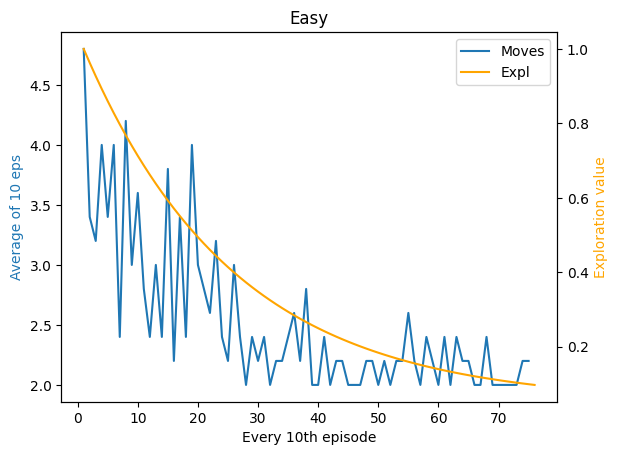

Training took 0.0 minutes and 20.188190698623657 seconds
S1: ['Livingroom', [], ['take apple']]
S2: ['Livingroom', ['apple.'], ['drop apple', 'put apple on table']]
S3: ['Livingroom', [], ['take apple from table']]
Action taken in step 1: take apple
Action taken in step 2: put apple on table
Finished in 2 moves
Actions taken:
take apple > put apple on table > 


                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ____

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `

[array([68.02187847]), array([42.89866566, 75.83258781]), array([53.59656037, 65.39444902, 84.46430846]), array([58.85533827, 47.73070719]), array([64.59496136, 81.98517111, 81.59913461]), array([79.19040923, 71.85328811, 24.23393223, 73.60294972, 91.87224474]), array([69.59879908, 78.35103354, 79.96442205]), array([70.57628953, 76.67477812, 63.2417037 , 90.93595493]), array([69.60612406, 65.2731569 , 73.72082374, 89.56041538]), array([ 80.10040326,  80.46388013,  13.06620244, 103.09939201,
        89.84236143]), array([102.56255806,  91.31564946,  48.1650874 ,  90.24112231,
       116.52787639]), array([47.67659927, 58.85191423, 47.67005052]), array([52.97044819, 51.60549835]), array([69.67639744, 11.80015633, 89.47108331, 78.72374032]), array([ 82.6484934 ,  92.59195249,  81.94757908,  45.44800162,
       104.69469091,  83.15028942]), array([77.32642485, 68.3205334 , 76.7810469 ]), array([ 89.5137165 ,  31.60047027,  99.71502905, 114.15953894]), array([ 85.99541095, 100.36351215]), a

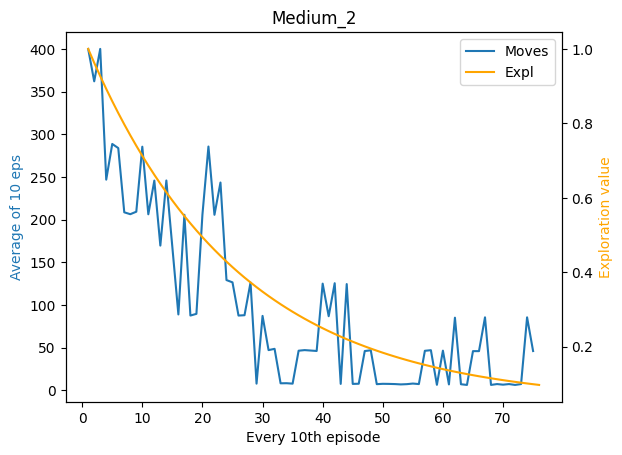

Training took 4.0 minutes and 46.78670358657837 seconds
S1: ['Livingroom', [], ['open door']]
S2: ['Livingroom', [], ['close door', 'go east']]
S3: ['Kitchen', [], ['close door', 'go west', 'open fridge']]
S4: ['Kitchen', [], ['open door', 'open fridge']]
S5: ['Kitchen', [], ['close fridge', 'open door', 'take apple from fridge']]
S6: ['Kitchen', ['apple.'], ['close fridge', 'drop apple', 'eat apple', 'insert apple into fridge', 'open door']]
S7: ['Kitchen', [], ['close fridge', 'open door', 'take apple']]
S8: ['Kitchen', [], ['close door', 'close fridge', 'go west', 'take apple']]
S9: ['Kitchen', [], ['close door', 'go west', 'open fridge', 'take apple']]
S10: ['Kitchen', ['apple.'], ['close door', 'drop apple', 'eat apple', 'go west', 'open fridge']]
S11: ['Livingroom', ['apple.'], ['close door', 'drop apple', 'eat apple', 'go east', 'put apple on table']]
S12: ['Kitchen', [], ['close door', 'close fridge', 'go west']]
S13: ['Kitchen', [], ['close fridge', 'open door']]
S14: ['Kitche

In [8]:
# (Άλλαξα το reward σε 100 + 100/step)

for env_name in env_names:

    # Load env
    game_file = '/usr/local/lib/python3.10/dist-packages/textworld/Created_Games/' + env_name + '.ulx'
    env, obs, infos = load_game(game_file=game_file)

    # Make agent
    agent = Q_agent(env)

    # Train
    agent.reset()
    agent.train(max_epochs=5, max_eps=150, title=env_name, min_expl=0.05, expl_decay_rate=0.004,
                    gamma=0.9, user_input=user_inputs[env_name])

    # Test
    action_courses[env_name] = agent.test()

toc(start, 'Total TextWorld training') # End timer. This timed the total TextWolrd training

### **Preprocess**

In [9]:
import pickle

def filter_actions(action_courses):
    rmv_actions = ['go east', 'go west', 'go north', 'go south']
    for action_course, actions_taken in action_courses.items():
        for sentence in actions_taken:
            if 'unlock' in sentence:
                action_courses[action_course].remove(sentence)
        action_courses[action_course] = list(filter(lambda action: action not in rmv_actions, actions_taken))
    return action_courses

def reset(envs):
    for env_name in envs:
        !cd /usr/local/lib/python3.10/dist-packages/rl-starter-files/storage && \
        rm -rf {env_name} -v

action_courses = filter_actions(action_courses)
print(action_courses)
# action_courses['Hard'] = ['take key', 'open door', 'open fridge', 'take apple from fridge', 'put apple on table']
# action_courses['Medium'] = ['open door', 'open fridge', 'take apple from fridge', 'put apple on table']
print(action_courses)

with open('/usr/local/lib/python3.10/dist-packages/rl-starter-files/storage/action_courses', 'wb') as fp:
    pickle.dump(action_courses, fp)

{'Easy': ['take apple', 'put apple on table'], 'Medium_2': ['open door', 'open fridge', 'take apple from fridge', 'put apple on table']}
{'Easy': ['take apple', 'put apple on table'], 'Medium_2': ['open door', 'open fridge', 'take apple from fridge', 'put apple on table']}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **MiniGrid Training**

Time to train the home environment simulator (i.e. MiniGrid) agent. We do this both using the deduced sub-tasks from TextWorld and without them for comparison.

Notice that the only connection between MiniGrid and Textworld are the deduced sub-tasks saved in the variable **action_courses**.

In [10]:
!cd /usr/local/lib/python3.10/dist-packages/minigrid/envs/ && \
python3 MyEnvs.py

import time
reset(envs)
# envs = ['Dense_Hard']
for env_name in envs:
    start = tic()
    env_dir = 'MiniGrid-' + env_name + '-v0'
    !cd /usr/local/lib/python3.10/dist-packages/rl-starter-files/ && \
    python3 -m scripts.train --algo {algo} --env {env_dir} --frames {frames} --model {env_name} --recurrence {recurrence}
    toc(start, env_name)

/usr/local/lib/python3.10/dist-packages/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-Sparse_Easy-v0 --frames 614400 --model Sparse_Easy --recurrence 8

Namespace(algo='ppo', env='MiniGrid-Sparse_Easy-v0', model='Sparse_Easy', seed=1, log_interval=1, save_interval=10, procs=16, frames=614400, epochs=4, batch_size=256, frames_per_proc=None, discount=0.99, lr=0.001, gae_lambda=0.95, entropy_coef=0.01, value_loss_coef=0.5, max_grad_norm=0.5, optim_eps=1e-08, optim_alpha=0.99, clip_eps=0.2, recurrence=8, text=False, mem=True)

Device: cpu

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()

### Graphs

In [11]:
import csv
import matplotlib.pyplot as plt

def data_extract(envs, data_label):

    storage_data = []
    new_dir_names = []

    for env_name in envs:
        file_name = '/usr/local/lib/python3.10/dist-packages/rl-starter-files/storage/' + env_name + '/log.csv'
        file = open(file_name)
        file = csv.reader(file)
        header = next(file)

        data = []
        for d in file:
            data.append(d)
        for i in range(len(header)):
            if header[i] == data_label: r_index = i

        data_hist = []
        for epoch in range(len(data)):
            sample = data[epoch][r_index]
            if sample != data_label:
                data_hist.append(round(float(sample), 5))

        storage_data.append(np.array(data_hist))
    return storage_data

data_rrmean = data_extract(envs, 'rreturn_mean')
data_rrstd = data_extract(envs, 'rreturn_std')
# data_rrmax = data_extract(envs, 'rreturn_max')
# data_rrmin = data_extract(envs, 'rreturn_min')


In [12]:
print(np.shape(data_rrmean))
# print(np.shape(data_rrmax))
# print(np.shape(data_rrmin))
print(np.shape(data_rrstd))
print(type(data_rrstd[0]))
# print(data_rrstd[0])


(4, 300)
(4, 300)
<class 'numpy.ndarray'>


In [13]:
# Simple Representation
def plotter(rrmean, rrstd):
    for i in np.arange(0,len(rrmean),2):

        # Find length of epochs (i.e. x-axis)
        x_len = np.shape(rrmean)[1]
        x = np.arange(0,x_len)

        # Find values of mean+std and mean-std for dense and sparse
        y_pos = np.add(rrmean[i], rrstd[i])
        y_neg = np.subtract(rrmean[i], rrstd[i])
        y_pos_ = np.add(rrmean[i+1], rrstd[i+1])
        y_neg_ = np.subtract(rrmean[i+1], rrstd[i+1])

        # Style properties
        fig = plt.figure(figsize=(6,4), edgecolor='black',dpi=100)
        title = env_names[int(i/2)]
        ax = fig.add_axes([0,0,1,1], projection='rectilinear',
        xlabel = 'Epochs',
        ylabel = 'Mean Return', title=title, facecolor='w')
        plt.style.use('seaborn')

        # Plot for Dense with blue
        plt.plot(rrmean[i], color='r', label='Sparse Rewarding')
        plt.plot(y_pos, color='r', alpha=0.06)
        plt.plot(y_neg, color='r', alpha=0.06)
        plt.fill_between(x, y_pos, y_neg, color='r', alpha=0.4)

        # Plot for Sparse with red
        plt.plot(rrmean[i+1], color='b', label='Dense Rewarding')
        plt.plot(y_pos_, color='b', alpha=0.06)
        plt.plot(y_neg_, color='b', alpha=0.06)
        plt.fill_between(x, y_pos_, y_neg_, color='royalblue', alpha=0.4)

        plt.legend()

['Sparse_Easy', 'Dense_Easy', 'Sparse_Medium_2', 'Dense_Medium_2']


<ipython-input-13-a8b275055f74>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-13-a8b275055f74>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


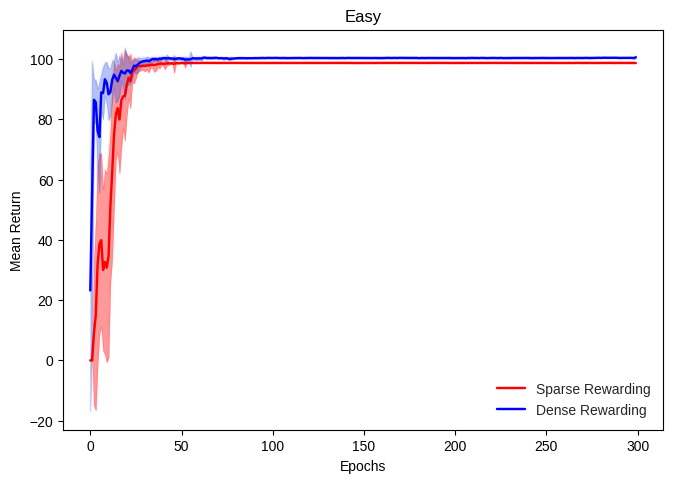

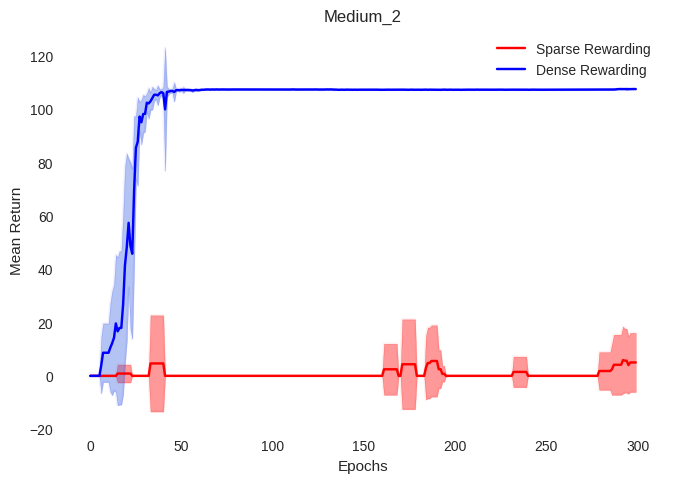

In [14]:
# plotter(data_rrmean, data_rrmax, data_rrmin)
plotter(data_rrmean, data_rrstd)
print(envs)

In [15]:
!cd /usr/local/lib/python3.10/dist-packages/rl-starter-files/storage/{env_name}/ && ls

events.out.tfevents.1695825021.6300c07d12ed  log.csv  log.txt  status.pt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
